In [23]:
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size = 16)
plt.rcParams.update({'axes.labelsize': 'x-large',
                     'axes.titlesize': 'x-large',
                     'xtick.labelsize':'x-large',
                     'ytick.labelsize':'x-large',
                     'legend.fontsize':'x-large'})

# get working directory, where the runs and
# routines should be stored
import os

HOME = os.getcwd()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
# Import dictionary with the name identifying
# the runs and pointing to the corresponding dictionary
from dirs import read_dirs as rd

dirs = rd('PRD_2020_ini')
dirs = rd('PRD_2020_hel', dirs)
dirs = rd('PRD_2020_noh', dirs)
dirs = rd('PRD_2020_ac', dirs)

R = [s for s in dirs]
dir0 = HOME + '/PRD_1903_08585/'

In [25]:
import run as r

# set quiet to False to see the spectra available, the runs read,
# and some characteristic info of the run
runs = r.initialize_runs(R, dir0, dirs, quiet=False)
r.characterize_runs(runs, quiet=False)

Reading run ini1

Spectra computed: 
['GWh', 'mag', 'GWs', 'kin', 'helGWh', 'helGWs', 'helmag', 'helkin']


Reading run ini2

Spectra computed: 
['GWh', 'mag', 'GWs', 'kin', 'helGWh', 'helGWs', 'helmag', 'helkin']


Reading run ini3

Spectra computed: 
['GWh', 'mag', 'GWs', 'kin', 'helGWh', 'helGWs', 'helmag', 'helkin']


Reading run hel1

Spectra computed: 
['GWh', 'mag', 'GWs', 'SCL', 'kin', 'helGWh', 'helGWs', 'helmag', 'helkin']


Reading run hel2

Spectra computed: 
['Tpq', 'GWh', 'VCT', 'mag', 'GWs', 'SCL', 'Str', 'kin', 'helTpq', 'helVCT', 'helGWh', 'helGWs', 'helmag', 'helkin', 'helSCL', 'helStr']


Reading run hel3

Spectra computed: 
['GWh', 'mag', 'GWs', 'kin', 'helGWh', 'helGWs', 'helmag', 'helkin']


Reading run hel4

Spectra computed: 
['GWh', 'mag', 'GWs', 'kin', 'helGWh', 'helGWs', 'helmag', 'helkin']


Reading run noh1

Spectra computed: 
['Tpq', 'GWh', 'VCT', 'mag', 'GWs', 'SCL', 'Str', 'kin', 'helTpq', 'helVCT', 'helGWh', 'helGWs', 'helmag', 'helkin', 'helSCL', 'helS

tini:  1.0
t[indt]:  1.0300439590547237
len(t):  31


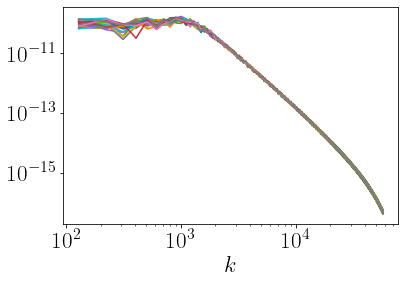

In [33]:
# We now compute the average and maximum spectra over time
# We study which is the index of the time array after which the spectra are no longer growing
# but just oscillating

### the resulting indices for the current runs are:
### runs : ini1, ini2, ini3, hel1, hel2, hel3, hel4, noh1, noh2, ac1, ac2, ac3
### indt : 3, 50, 300, 10, 20, 80, 15, 10, 30, 11, 10, 20

run = runs.get('ini1')
t = run.spectra.get('t_GWs')
indt = 3
run.min_max_stat(indt=indt, sp='GWs', plot=True)

print('tini: ', run.tini)
print('t[indt]: ', t[indt])
print('len(t): ', len(t))

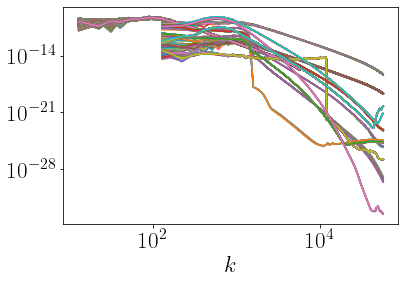

In [30]:
import numpy as np

# once we now the indices corresponding to each run we can run all of them
indsst=np.array([3, 50, 300, 10, 20, 80, 15, 10, 30, 11, 10, 20])
j = 0
for i in runs:
    run = runs.get(i)
    t = run.spectra.get('t_GWs')
    indt = indsst[j]
    j += 1
    run.min_max_stat(indt=indt, sp='GWs', plot=True)

In [34]:
### We can save the variables runs now to avoid repeating the
### computation of the averaged and maximum spectra
for i in runs:
    run = runs.get(i)
    run.save(dir0=dir0)

Saved ini1
Output file is ini1.pckl in 
/Users/roperpol/GW_turbulence/GW_turbulence/PRD_1903_08585/M1152e_exp6k4_M4b
Saved ini2
Output file is ini2.pckl in 
/Users/roperpol/GW_turbulence/GW_turbulence/PRD_1903_08585/M1152e_exp6k4
Saved ini3
Output file is ini3.pckl in 
/Users/roperpol/GW_turbulence/GW_turbulence/PRD_1903_08585/M1152e_exp6k4_k60b
Saved hel1
Output file is hel1.pckl in 
/Users/roperpol/GW_turbulence/GW_turbulence/PRD_1903_08585/F1152d2_sig1_t11_M2c_double
Saved hel2
Output file is hel2.pckl in 
/Users/roperpol/GW_turbulence/GW_turbulence/PRD_1903_08585/F1152a_sig1_t11d_double
Saved hel3
Output file is hel3.pckl in 
/Users/roperpol/GW_turbulence/GW_turbulence/PRD_1903_08585/F1152a_sig1
Saved hel4
Output file is hel4.pckl in 
/Users/roperpol/GW_turbulence/GW_turbulence/PRD_1903_08585/F1152a_k10_sig1
Saved noh1
Output file is noh1.pckl in 
/Users/roperpol/GW_turbulence/GW_turbulence/PRD_1903_08585/F1152b_sig0_t11_M4
Saved noh2
Output file is noh2.pckl in 
/Users/roperpol/GW